In [1]:
# Imports
from sklearn.svm import LinearSVC
from scipy.special import erf
import pylab

import nest

In [2]:
# Create a neuron and get its status
neuron = nest.Create("iaf_psc_alpha")
nest.GetStatus(neuron)

({'archiver_length': 0,
  'beta_Ca': 0.001,
  'C_m': 250.0,
  'Ca': 0.0,
  'E_L': -70.0,
  'element_type': <SLILiteral: neuron>,
  'frozen': False,
  'global_id': 1,
  'I_e': 0.0,
  'local': True,
  'local_id': 1,
  'model': <SLILiteral: iaf_psc_alpha>,
  'node_uses_wfr': False,
  'parent': 0,
  'post_trace': 0.0,
  'recordables': (<SLILiteral: I_syn_ex>,
   <SLILiteral: I_syn_in>,
   <SLILiteral: V_m>,
   <SLILiteral: weighted_spikes_ex>,
   <SLILiteral: weighted_spikes_in>),
  'supports_precise_spikes': False,
  'synaptic_elements': {},
  't_ref': 2.0,
  't_spike': -1.0,
  'tau_Ca': 10000.0,
  'tau_m': 10.0,
  'tau_minus': 20.0,
  'tau_minus_triplet': 110.0,
  'tau_syn_ex': 2.0,
  'tau_syn_in': 2.0,
  'thread': 0,
  'thread_local_id': -1,
  'V_m': -70.0,
  'V_min': -inf,
  'V_reset': -70.0,
  'V_th': -55.0,
  'vp': 0},)

In [3]:
# Change the neuron's parameter value
nest.SetStatus(neuron, {"I_e": 376.0})
nest.GetStatus(neuron, 'I_e')

(376.0,)

In [4]:
# Generate analysis apparatus
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
spikedetector = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

# Create connections with apparatus
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikedetector)

# Simulate
nest.Simulate(1000.0)

# Get simulation data
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

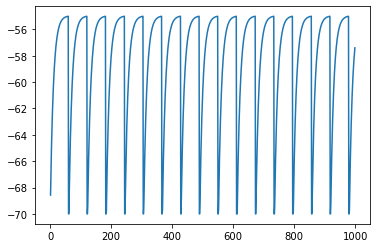

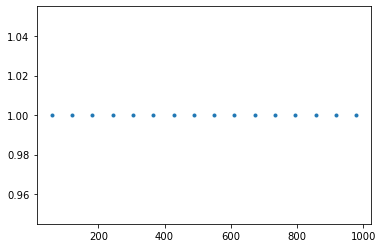

In [5]:
# Plot analysis
pylab.figure(1)
pylab.plot(ts, Vms)

dSD = nest.GetStatus(spikedetector,keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
pylab.figure(2)
pylab.plot(ts, evs, ".")
pylab.show()

In [6]:
# Two unconnected neurons simulation
from sklearn.svm import LinearSVC
from scipy.special import erf
import pylab

import nest

# Create neurons
neuron = nest.Create("iaf_psc_alpha")
neuron2 = nest.Create("iaf_psc_alpha")

# Change neurons' parameters
nest.SetStatus(neuron, {"I_e": 376.0})
nest.SetStatus(neuron2, {"I_e": 370.0})

# Generate analysis apparatus
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
spikedetector = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

# Make Connections
nest.Connect(multimeter, neuron)
nest.Connect(multimeter, neuron2)
nest.Connect(neuron, spikedetector)

# Simulate
nest.Simulate(1000.0)

# Get simulation data from the multimeter
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

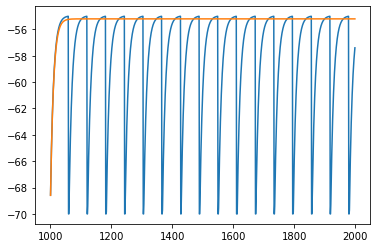

In [7]:
# Generate plots
pylab.figure(2)
Vms1 = dmm["events"]["V_m"][::2] # start at index 0: till the end: each second entry
ts1 = dmm["events"]["times"][::2]
pylab.plot(ts1, Vms1)
Vms2 = dmm["events"]["V_m"][1::2] # start at index 1: till the end: each second entry
ts2 = dmm["events"]["times"][1::2]
pylab.plot(ts2, Vms2)